In [65]:
import numpy as np
import scipy.signal as ss
import scipy.fft as fft
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
def fspecial(filter_type, alpha=0.2):
    '''
    Creates a tow-dimensional filter of the specified type. Possible values for filter_type are:
        'laplacian'
        'unsharp'
    @param      filter_type      Type of desiered filter.
    @return     Numpy array containing coefficients of impulse response for the desired filter. 
    '''
    if (filter_type == 'laplacian'):
        a = max(0, min(alpha, 1))
        h1 = a/ (a + 1)
        h2 = (1 - a) / (a + 1)
        return np.array([[h1,       h2,     h1],
                         [h2, -4 / (a + 1), h2],
                         [h1,       h2,     h1]])

    elif (filter_type == 'unsharp'):
        aux = np.array([[0,  0,  0],
                         [0,  1,  0],
                         [0,  0,  0]])
        return aux - fspecial('laplacian', alpha)

In [79]:
def freqz2(kernel, N=128, plot=True):
    H = fft.fftshift(fft.fft2(kernel, [N, N]))
    f = fft.fftshift(fft.fftfreq(N))

    if (plot):
        fig = go.Figure(data=[go.Surface(x=f, y=f, z=np.abs(H))])
        fig.show()

    return f, H

In [81]:
N = 256
h = fspecial('unsharp', alpha=0.2)
f, H = freqz2(h, N)

In [77]:
big = np.zeros((N, N))
big[int(N/2),int(N/2)] = 1

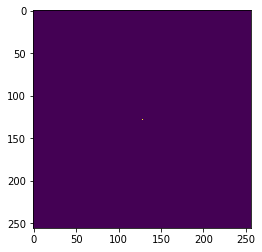

In [78]:
plt.imshow(big)

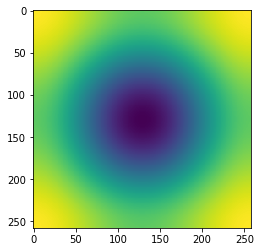

In [82]:
h1 = ss.convolve2d(big, h)
S = fft.fft2(h1)
SM = np.abs(S)

plt.imshow(fft.fftshift(SM / np.max(np.max(SM))))

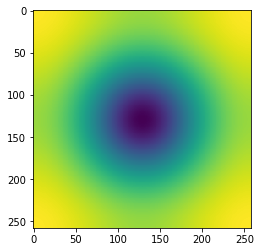

In [84]:
IMd = np.log(1 + np.abs(SM))
plt.imshow(fft.fftshift(IMd / np.max(np.max(IMd))))